# POSTTETS 5 KB
## Lidya Simanungkalit
## 2009106125
## KB C1 20

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# About Dataset
### Klasifikasi Tipe Bintang


###### Temperature (suhu)
###### L -- L/Lo  (Luminositas Matahari Rata-rata)
###### R -- R/Ro ((Rata-Rata Radius Matahari))
###### AM -- Mv (Besaran Mutlak)
###### COLOR -- Warna Umum Spektrum
###### Spectral_Class --(Spesifikasi SMASS) -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
###### Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants, Hyper Giants

TARGET:
Type
from 0 to 5

###### Red Dwarf = 0,  Brown Dwarf = 1, White Dwarf =2, Main Sequence =3,  Super Giants =4,Hyper Giants =5


In [2]:
data = pd.read_csv("Stars.csv")
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
#cek data null
data.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [4]:
data.duplicated().sum()

0

# Data split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data[['Temperature','L','R','A_M',]]
y = data[['Type']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Data Normalisasi

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [11]:
data['Type'] = data['Type'].astype(object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


# Algoritma KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
Knn = KNeighborsClassifier()
Knn.fit(X_train_std,y_train)

knn_pred = Knn.predict(X_test_std)
akurasi_KNN = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))
print("Akurasi algoritma KNN :", round(akurasi_KNN,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8
           3       0.88      1.00      0.93         7
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        13

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72

Akurasi algoritma KNN : 0.99


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#  Algoritma NAIVE BAYES

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
gaussnb  = GaussianNB()
gaussnb.fit(X_train_std,y_train)

gaussnb_pred = gaussnb.predict(X_test_std)
akurasi_gnb = accuracy_score(y_test, gaussnb_pred)
print(classification_report(y_test, gaussnb_pred))
print("Akurasi algoritma Naive Bayes :", round(akurasi_gnb,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Akurasi algoritma Naive Bayes : 1.0


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#  Algoritma SVM

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC()
svm.fit(X_train_std,y_train)

svm_pred = svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)
print(classification_report(y_test, svm_pred))
print("Akurasi algoritma SVC :", round(akurasi_svm,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8
           3       0.78      1.00      0.88         7
           4       1.00      0.85      0.92        13
           5       1.00      1.00      1.00        13

    accuracy                           0.97        72
   macro avg       0.96      0.97      0.97        72
weighted avg       0.98      0.97      0.97        72

Akurasi algoritma SVC : 0.97


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Algoritma  Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier(max_depth=2)

In [20]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [21]:
dt_pred= dt.predict(X_test)

In [22]:
akurasi_dt = accuracy_score(y_test, dt_pred)
print(classification_report(y_test, dt_pred))
print("Akurasi algoritma Decision Tree :", round(akurasi_dt,2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        14
           2       1.00      1.00      1.00         8
           3       0.18      1.00      0.31         7
           4       0.50      1.00      0.67        13
           5       0.00      0.00      0.00        13

    accuracy                           0.39        72
   macro avg       0.28      0.50      0.33        72
weighted avg       0.22      0.39      0.26        72

Akurasi algoritma Decision Tree : 0.39


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# perbandingan akurasi setiap algoritma

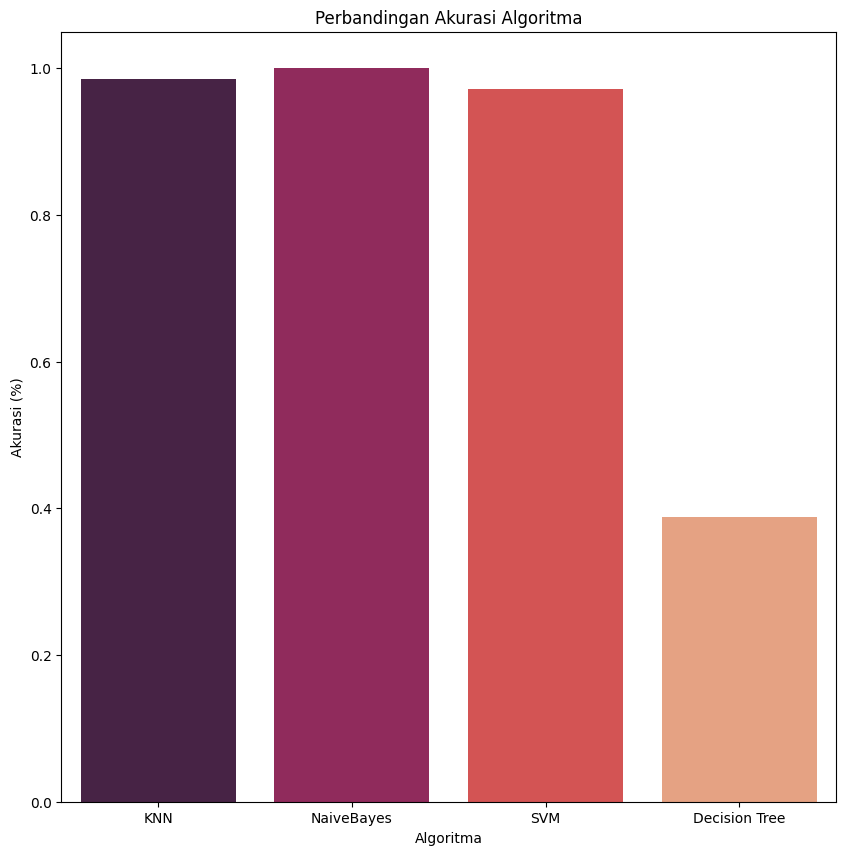

In [23]:
algoritma = ["KNN","NaiveBayes","SVM","Decision Tree"]
akurasi = [akurasi_KNN,akurasi_gnb,akurasi_svm,akurasi_dt]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='rocket')

plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

# Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix : 

 [[13  4  0  0  0  0]
 [ 4 10  0  0  0  0]
 [ 0  0  5  3  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0  0  1  8  4]
 [ 0  0  0  1  7  5]]


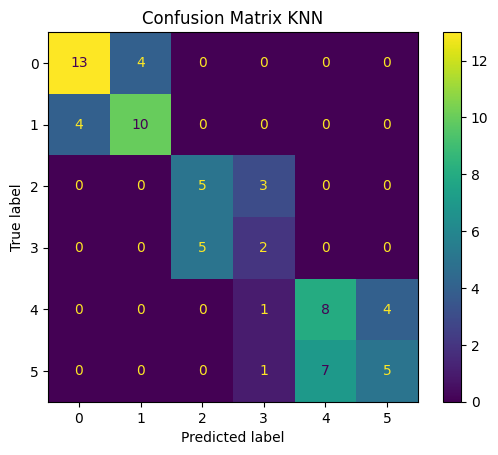

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix : \n\n', cm)

displays = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
displays.plot()

plt.title("Confusion Matrix KNN")
plt.grid(False)

In [26]:
from sklearn.model_selection import GridSearchCV


# Hyperparameter Tunning(KNN)

In [27]:
modelKNN = KNeighborsClassifier()

param_grid = { "n_neighbors" :[i for i in range(0,5)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

In [28]:
#parameter terbaik
print(gs.best_params_)

{'n_neighbors': 1}


In [29]:
print("Akurasi Training Set : ",round(gs.score(X_train,y_train)*100,1),"%")

Akurasi Training Set :  100.0 %
